# A

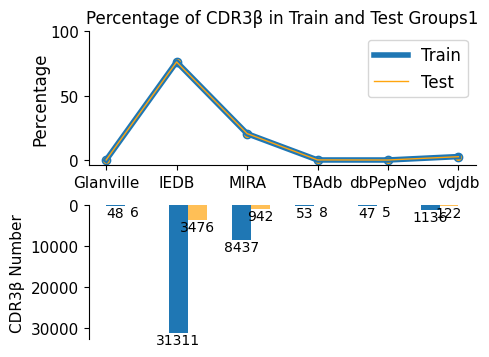

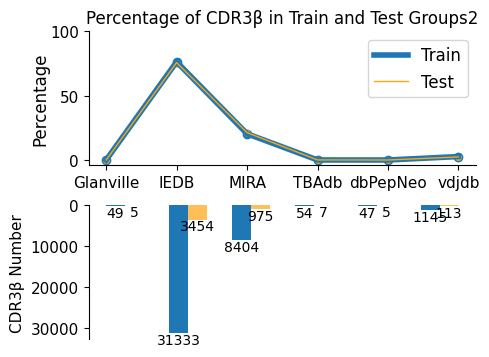

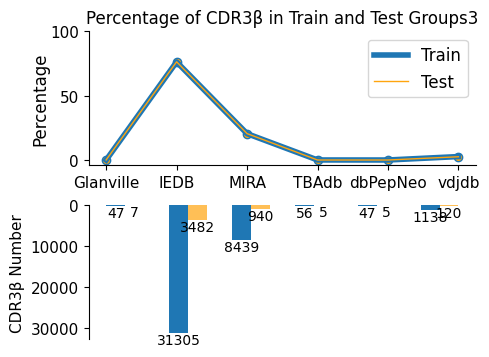

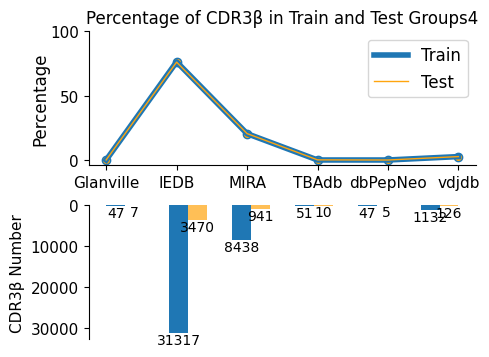

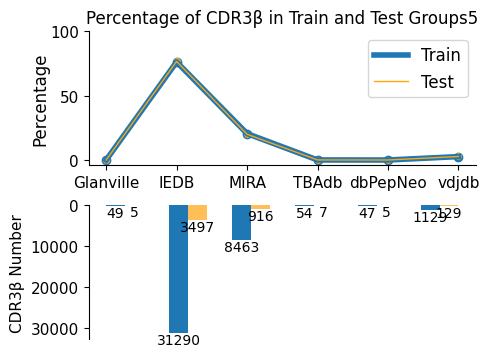

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def plot_train_test_comparison(train_file, test_file, title, save_path=None):
    train_50 = pd.read_csv(train_file)
    test_50 = pd.read_csv(test_file)

    percentage_train = train_50.groupby('database')['CDR3B'].count().reset_index()
    percentage_train['Percentage'] = (percentage_train['CDR3B'] / train_50['CDR3B'].count()) * 100
    percentage_test = test_50.groupby('database')['CDR3B'].count().reset_index()
    percentage_test['Percentage'] = (percentage_test['CDR3B'] / test_50['CDR3B'].count()) * 100

    x_train = percentage_train['database']
    y_train = percentage_train['Percentage']
    x_test = percentage_test['database']
    y_test = percentage_test['Percentage']

    plt.rcParams['font.size'] = 12
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 4))

    ax1.plot(x_train, y_train, color='#1F77B4', linewidth=4, label='Train')
    ax1.plot(x_test, y_test, color='#FFA50E', linewidth=1, label='Test')
    ax1.scatter(x_train, y_train, color='#1F77B4', s=36)
    ax1.scatter(x_test, y_test, color='#FFA50E', s=16)

    ax1.set_ylabel('Percentage', fontsize=12)
    ax1.set_title(title, fontsize=12)
    ax1.tick_params(axis='x', labelsize=11)
    ax1.tick_params(axis='y', labelsize=11)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.legend()
    ax1.set_ylim(-4, 100)
    ax1.yaxis.set_label_coords(-0.1, 0.5)

    train_database = percentage_train['database']
    train_CDR3B = percentage_train['CDR3B']
    test_database = percentage_test['database']
    test_CDR3B = percentage_test['CDR3B']
    bar_width = 0.3

    ax2.bar(range(len(train_database)), train_CDR3B, label='Train', color='#1F77B4', alpha=1, width=bar_width)
    ax2.bar([x + bar_width for x in range(len(test_database))], test_CDR3B, label='Test', color='#FFA50E', alpha=0.7, width=bar_width)

    for i in range(len(train_database)):
        ax2.text(i, train_CDR3B[i] - 0.1, str(train_CDR3B[i]), ha='center', va='top', fontsize=10)
        ax2.text(i + bar_width, test_CDR3B[i] - 0.1, str(test_CDR3B[i]), ha='center', va='top', fontsize=10)

    ax2.set_xticks([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.invert_yaxis()
    plt.subplots_adjust(hspace=0.3)
    ax2.tick_params(axis='y', labelsize=11)
    ax2.set_ylabel('CDR3β Number', fontsize=11)

    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight')

    plt.show()
    plt.close()


for i in range(1, 6):
    train_file = f"./raw_data/pair50_repeat10/train{i}.csv"
    test_file = f"./raw_data/pair50_repeat10/test{i}.csv"
    title = f'Percentage of CDR3β in Train and Test Groups{i}'
    save_path = f"./All_results/fig/fig2s//A_train_test_{chr(64+i)}_S.pdf"
    #plot_train_test_comparison(train_file, test_file, title, save_path if i != 3 else None) 
    plot_train_test_comparison(train_file, test_file, title, save_path) 


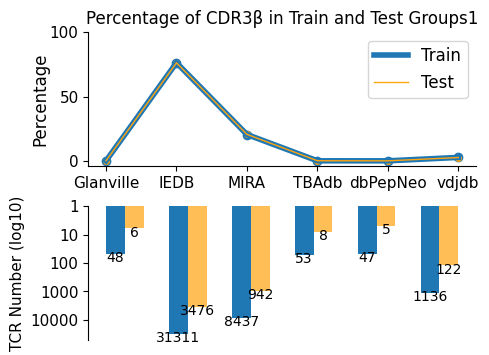

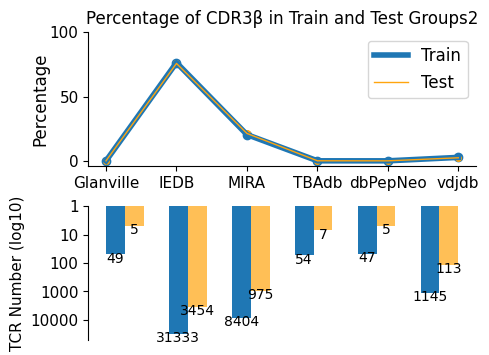

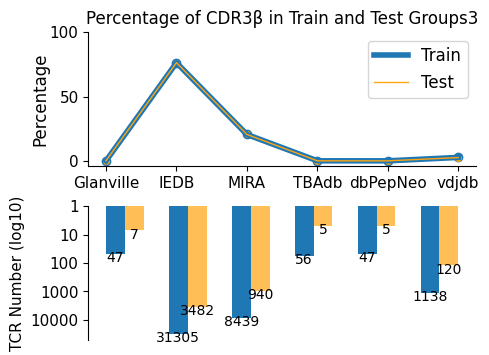

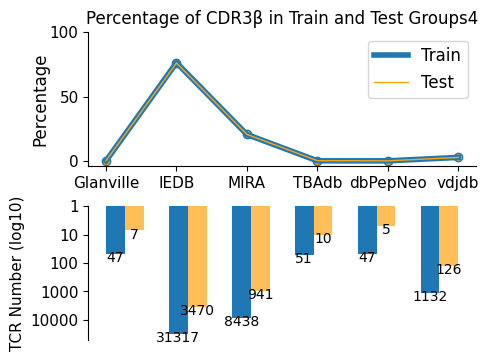

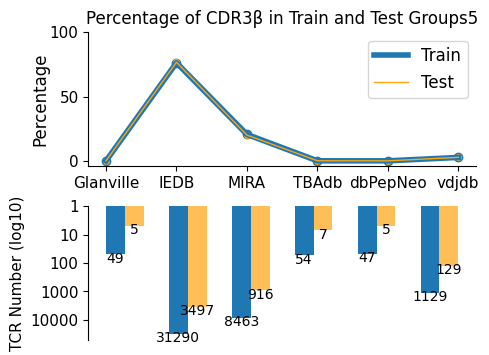

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


def plot_train_test_comparison(train_file, test_file, title, save_path=None):
    train_50 = pd.read_csv(train_file)
    test_50 = pd.read_csv(test_file)

    percentage_train = train_50.groupby('database')['CDR3B'].count().reset_index()
    percentage_train['Percentage'] = (percentage_train['CDR3B'] / train_50['CDR3B'].count()) * 100
    percentage_test = test_50.groupby('database')['CDR3B'].count().reset_index()
    percentage_test['Percentage'] = (percentage_test['CDR3B'] / test_50['CDR3B'].count()) * 100

    x_train = percentage_train['database']
    y_train = percentage_train['Percentage']
    x_test = percentage_test['database']
    y_test = percentage_test['Percentage']

    plt.rcParams['font.size'] = 12
    plt.rcParams['pdf.fonttype'] = 42
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 4))

    ax1.plot(x_train, y_train, color='#1F77B4', linewidth=4, label='Train')
    ax1.plot(x_test, y_test, color='#FFA50E', linewidth=1, label='Test')
    ax1.scatter(x_train, y_train, color='#1F77B4', s=36)
    ax1.scatter(x_test, y_test, color='#FFA50E', s=16)

    ax1.set_ylabel('Percentage', fontsize=12)
    ax1.set_title(title, fontsize=12)
    ax1.tick_params(axis='x', labelsize=11)
    ax1.tick_params(axis='y', labelsize=11)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.legend()
    ax1.set_ylim(-4, 100)
    ax1.yaxis.set_label_coords(-0.1, 0.5)

    train_database = percentage_train['database']
    train_CDR3B = percentage_train['CDR3B']
    test_database = percentage_test['database']
    test_CDR3B = percentage_test['CDR3B']
    bar_width = 0.3
    
    ax2.bar(range(len(train_database)), np.log10(train_CDR3B), label='Train', color='#1F77B4', alpha=1, width=bar_width)
    ax2.bar([x + bar_width for x in range(len(test_database))], np.log10(test_CDR3B), label='Test', color='#FFA50E', alpha=0.7, width=bar_width)

    for i in range(len(train_database)):
        ax2.text(i, np.log10(train_CDR3B[i]) - 0.1, str(train_CDR3B[i]), ha='center', va='top', fontsize=10)
        ax2.text(i + bar_width, np.log10(test_CDR3B[i]) - 0.1, str(test_CDR3B[i]), ha='center', va='top', fontsize=10)

    ax2.set_yticks(np.log10([1, 10, 100, 1000, 10000]))  
    ax2.set_yticklabels([1, 10, 100, 1000, 10000]) 

    ax2.set_xticks([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.invert_yaxis()
    plt.subplots_adjust(hspace=0.3)
    ax2.tick_params(axis='y', labelsize=11)
    ax2.set_ylabel('TCR Number (log10)', fontsize=11)

    if save_path:
        plt.savefig(save_path, format='pdf', bbox_inches='tight')

    plt.show()
    plt.close()

for i in range(1, 6):
    train_file = f"./raw_data/pair50_repeat10/train{i}.csv"
    test_file = f"./raw_data/pair50_repeat10/test{i}.csv"
    title = f'Percentage of CDR3β in Train and Test Groups{i}'
    save_path = f"./All_results/fig/fig2s/A_train_test_{chr(64+i)}_S.pdf"
    plot_train_test_comparison(train_file, test_file, title, save_path)


# G

/tmp/ipykernel_25479/3891528950.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data.loc[:, 'species_count'] = unique_data['antigen_species'].map(species_unique_counts)


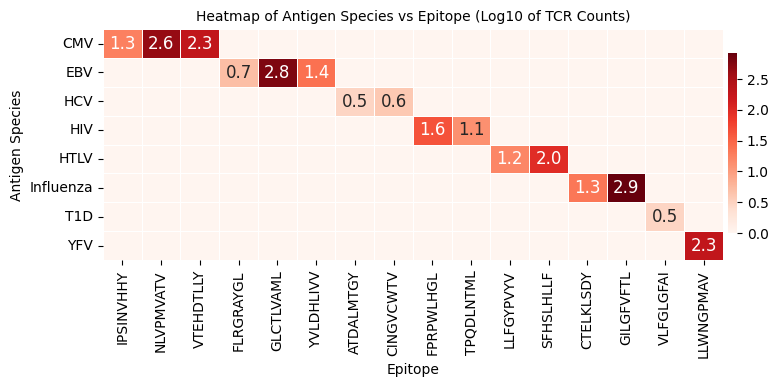

In [73]:
from matplotlib.colors import LinearSegmentedColormap

from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("./raw_data/Validation_McPAS.csv")
data = data[['Epitope', 'antigen_species']]
import pandas as pd
replacement_dict = {
    'Epstein Barr virus (EBV)': 'EBV',
    'Cytomegalovirus (CMV)':'CMV',
    'Hepatitis C virus': 'HCV',
     'Human immunodeficiency virus (HIV)':'HIV',
    'HIV-1': 'HCV',
    'InfluenzaA': 'Influenza',
    'Influenza A virus': 'Influenza',
    'Yellow fever virus':'YFV',
    'Diabetes Type 1':'T1D',
    'HTLV-1':'HTLV',
    'HTLV-1 (Chronic':'HTLV'}

data['antigen_species'] = data['antigen_species'].replace(replacement_dict)
data['antigen_species'] = data['antigen_species'].fillna('Unknown')
pd.unique(data['antigen_species'])

unique_data = data.drop_duplicates(subset=['Epitope', 'antigen_species'])
species_unique_counts = unique_data.groupby('antigen_species')['Epitope'].nunique()
unique_data.loc[:, 'species_count'] = unique_data['antigen_species'].map(species_unique_counts)
sorted_df = unique_data.sort_values(by=['species_count', 'antigen_species', 'Epitope'], ascending=[False, True, True])
sorted_df = sorted_df.drop(columns=['species_count'])
sorted_df = sorted_df.reset_index(drop=True)
epi_sorted=sorted_df.drop_duplicates(subset=['Epitope'], keep='first')
epitope_order = epi_sorted['Epitope'].tolist()
count_df = data.groupby(['antigen_species', 'Epitope']).size().unstack(fill_value=0)
sorted_df = count_df.reindex(columns=epitope_order)
row_order = pd.unique(epi_sorted['antigen_species'])
sorted_df = sorted_df.reindex(row_order)
#sorted_df.to_csv('./All_results/data/data2/B_train_test_data.csv')
count_df_log = np.log10(sorted_df + 1)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['xtick.labelsize'] = 10 
plt.rcParams['ytick.labelsize'] = 10  
plt.figure(figsize=(10, 3))
annot_matrix = np.where(count_df_log > 0, count_df_log.round(1).astype(str), '')
colors = ["#f0f8ff", "#f0dc82", "#004225"]  
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
sns.heatmap(count_df_log, cmap='Reds', linewidths=.5, annot=annot_matrix, fmt="s", cbar_kws={'shrink': 0.5})
plt.title("Heatmap of Antigen Species vs Epitope (Log10 of TCR Counts)", fontsize=10)
plt.xlabel("Epitope", fontsize=10)
plt.ylabel("Antigen Species", fontsize=10)
cbar = plt.gcf().axes[-1]
cbar.set_position([0.75, 0.2, 0.02, 0.6]) 
cbar.set_label('Log10(TCR Count)')
cbar.yaxis.label.set_size(10)  
cbar.yaxis.labelpad = 10      

path = "./All_results/fig/fig2s/"
plt.savefig(path + 'G_seen_validation.pdf', bbox_inches='tight', edgecolor='black')
plt.show()

# H

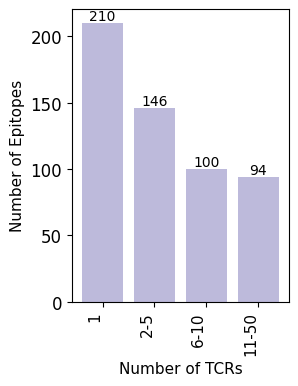

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

all_data=pd.read_csv("./raw_data/epitope_less_50.csv")
epitope_counts  = all_data.groupby('Epitope')['CDR3B'].nunique()
epitope_counts_df = epitope_counts.reset_index()
bins = [1, 2,5,10,50]
labels = ['1','2-5','6-10','11-50']
epitope_counts_df['Interval'] = pd.cut(epitope_counts_df['CDR3B'], bins=bins, labels=labels, right=False)
interval_counts = epitope_counts_df['Interval'].value_counts().sort_index()
plt.figure(figsize=(2.8, 3.8))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12  
plt.rcParams['ytick.labelsize'] = 12  
plt.rcParams['legend.fontsize'] = 12 
bars = plt.bar(interval_counts.index, interval_counts.values, color='#BDBADB')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height),
             ha='center', va='bottom', fontsize=10)
plt.xlabel('Number of TCRs',fontsize=11)
plt.ylabel('Number of Epitopes', fontsize=11)
plt.xticks(fontsize=11, rotation=90, ha='right', va='top')
path = "./All_results/fig/fig2s/"
plt.savefig(path + 'H_unseen_test.pdf', bbox_inches='tight', edgecolor='black')
plt.show()

# I

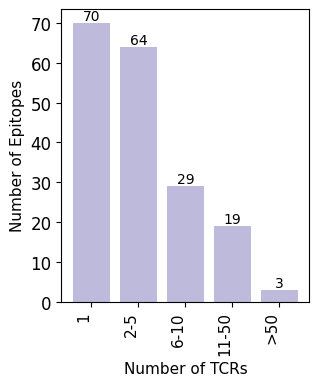

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
all_data=pd.read_csv("./raw_data/unkown_validaiton.csv")
epitope_counts  = all_data.groupby('Epitope')['CDR3B'].nunique()
epitope_counts_df = epitope_counts.reset_index()
#bins = [1, 5, 50, 100, ]
#labels = ['1','2-5', '6-50', '51-100', '>100']
bins = [1, 2,5,10,50,float('inf')]
labels = ['1','2-5','6-10','11-50', '>50']
epitope_counts_df['Interval'] = pd.cut(epitope_counts_df['CDR3B'], bins=bins, labels=labels, right=False)
interval_counts = epitope_counts_df['Interval'].value_counts().sort_index()
plt.figure(figsize=(3.2, 3.8))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12  
plt.rcParams['ytick.labelsize'] = 12  
plt.rcParams['legend.fontsize'] = 12 
bars = plt.bar(interval_counts.index, interval_counts.values, color='#BDBADB')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height),
             ha='center', va='bottom', fontsize=10)
plt.xlabel('Number of TCRs',fontsize=11)
plt.ylabel('Number of Epitopes', fontsize=11)
plt.xticks(fontsize=11, rotation=90, ha='right', va='top')
path = "./All_results/fig/fig2s/"
plt.savefig(path + 'I_unseen_validaiton.pdf', bbox_inches='tight', edgecolor='black')
plt.show()

# J

/tmp/ipykernel_25479/3170205842.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Epitope_Count'] = data['Epitope'].map(epitope_counts)


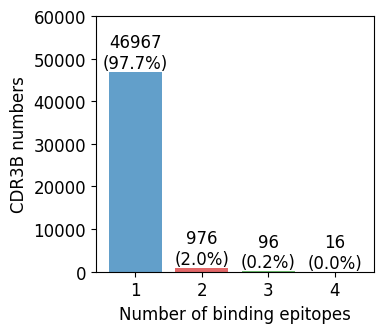

In [64]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir(new_path)
all_data=pd.read_csv("./raw_data/Validation_McPAS.csv")
validaiton['vdjdb_score']='Nan'
validaiton = validaiton.reindex(all_data.columns, axis=1)
all_data = pd.concat([validaiton, all_data], ignore_index=True)
all_data['database']=all_data['database'].replace('vdjdb', 'VDJdb')
data=all_data[(all_data['CDR3B_length'].between(10, 18)) & (all_data['Epitope_length'] == 9)]
epitope_counts = data['Epitope'].value_counts()
data.loc[:, 'Epitope_Count'] = data['Epitope'].map(epitope_counts)
data = data.sort_values('Epitope')
data = data[data['Epitope_Count'] >= 50]

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['xtick.labelsize'] = 12  
plt.rcParams['ytick.labelsize'] = 12  
data = data[['CDR3B', 'Epitope']]
data.drop_duplicates(subset=['CDR3B', 'Epitope'], keep='first', inplace=True)
data['CDR3B_Count'] = data.groupby('CDR3B')['CDR3B'].transform('count')
count_df = data.groupby('CDR3B')['CDR3B_Count'].sum().reset_index()
cdr3b_counts = data['CDR3B_Count'].value_counts()
counts = cdr3b_counts
categories = ['1', '2', '3', '4'] 
positions = range(len(counts))  
total_count = sum(counts) 
percentages = [(count / total_count) * 100 for count in counts] 
colors = ['#1f77b4', '#d62728', '#2ca02c', '#ff7f0e']
plt.figure(figsize=(4, 3.5))
bars = plt.bar(positions, counts, align='center', alpha=0.7, color=colors)
plt.xlabel("Number of binding epitopes")  
plt.ylabel('CDR3B numbers') 
plt.xticks(positions, categories)  
plt.ylim(0, 60000)  
for bar, count in zip(bars, counts):
    y_position = bar.get_height()  
    text = f'{count}\n({(count / total_count * 100):.1f}%)'  
    plt.text(bar.get_x() + bar.get_width() / 2, y_position, text, ha='center', va='bottom') 
plt.tight_layout()  
path = "./All_results/fig/fig2s/"
plt.savefig(path + 'J_train_cross_reactivity.pdf', bbox_inches='tight', edgecolor='black')
plt.show()
plt.close()

# K

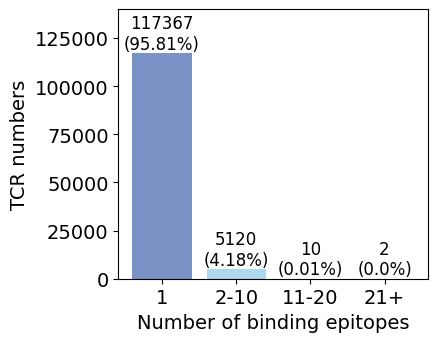

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./raw_data/all_data.csv")
data = data.drop_duplicates(subset=['CDR3B', 'Epitope'], keep='first')

unique_epitopes_per_cdr3b = data.groupby('CDR3B')['Epitope'].nunique()
result_df = unique_epitopes_per_cdr3b.reset_index().rename(columns={'Epitope': 'count', 'CDR3B': 'CDR3B'})
bins = [1, 2, 10, 20, float('inf')] 
labels = ['1', '2-10', '11-20', '21+']
result_df['group'] = pd.cut(result_df['count'], bins=bins, labels=labels, right=False)
group_counts = result_df['group'].value_counts().reindex(labels)
total_counts = result_df['group'].count()
group_percentages = (group_counts / total_counts * 100).round(2)
summary_df = pd.DataFrame({
    'Count': group_counts,
    'Percentage': group_percentages
})

plt.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(figsize=(4, 3.5))  
colors = ['#7B92C7', '#ADD9EE', '#9EC4BE', '#FFD47F']
bars = ax.bar(summary_df.index, summary_df['Count'], color=colors)

for bar, count, percentage in zip(bars, summary_df['Count'], summary_df['Percentage']):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(count)}\n({percentage}%)', ha='center', va='bottom')

ax.set_xlabel('Number of binding epitopes', fontsize=14)
ax.set_ylabel('TCR numbers', fontsize=14)
ax.set_ylim(0, 140000)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=0)

path = "./All_results/fig/fig2s/"
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(path + 'K_all_data_cross_reactivity.pdf', bbox_inches='tight', edgecolor='black')
plt.show()
